<a href="https://colab.research.google.com/github/merriekay/CS167Code/blob/main/Day09_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 09 Notes: Introduction to [Scikit-Learn](https://scikit-learn.org/stable/modules/classes.html)

The overall algorithm for scikit-learn (sklearn) is:
1. Load data
2. Split Data: use `train_test_split()`
3. Create a classifier/regressor object
4. Call `fit()` (to train the model)
5. Call `predict()` to get the predictions
6. Call a metric function to measure performance

In the cell below, we do steps 1-3:

In [14]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#classic scikit-learn algorithm

#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
iris_data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/irisData.csv')

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier()

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
iris_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(iris_predictions[i],"\t", test_sln.iloc[i])


#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, iris_predictions, labels=iris_labels)
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))

Accuracy: 0.9
___PREDICTED___ 	  ___ACTUAL___
Iris-versicolor 	 Iris-virginica
Iris-virginica 	 Iris-virginica
Iris-virginica 	 Iris-virginica
Iris-versicolor 	 Iris-versicolor
Iris-virginica 	 Iris-virginica
Iris-versicolor 	 Iris-versicolor
Iris-virginica 	 Iris-virginica
Iris-versicolor 	 Iris-versicolor
Iris-virginica 	 Iris-virginica
Iris-virginica 	 Iris-virginica
Iris-virginica 	 Iris-virginica
Iris-setosa 	 Iris-setosa
Iris-setosa 	 Iris-setosa
Iris-versicolor 	 Iris-versicolor
Iris-setosa 	 Iris-setosa
Iris-versicolor 	 Iris-virginica
Iris-setosa 	 Iris-setosa
Iris-virginica 	 Iris-versicolor
Iris-setosa 	 Iris-setosa
Iris-setosa 	 Iris-setosa
Iris-versicolor 	 Iris-versicolor
Iris-virginica 	 Iris-virginica
Iris-setosa 	 Iris-setosa
Iris-setosa 	 Iris-setosa
Iris-versicolor 	 Iris-versicolor
Iris-versicolor 	 Iris-versicolor
Iris-versicolor 	 Iris-versicolor
Iris-versicolor 	 Iris-versicolor
Iris-setosa 	 Iris-setosa
Iris-versicolor 	 Iris-versicolor
                 Iris-set

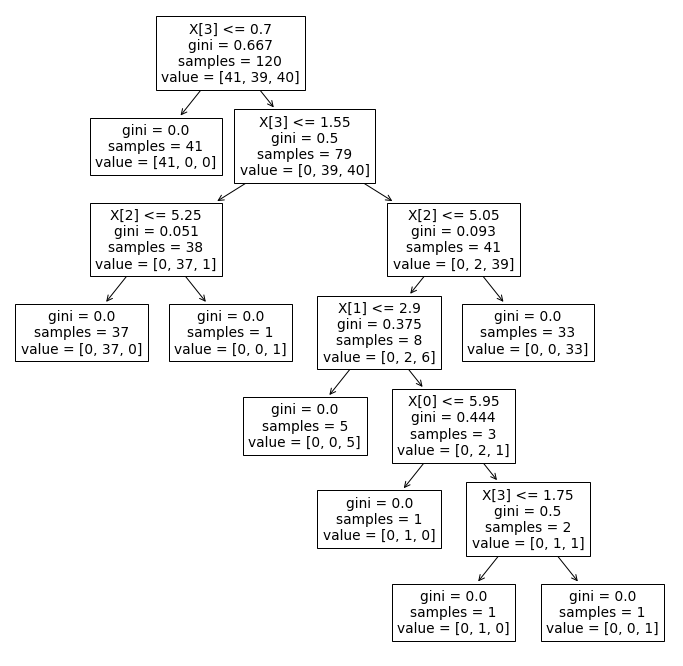

In [19]:
# visualizing decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12)) # Makes is to the graph isn't tiny
tree.plot_tree(dt); #if you remove the ;, you'll get more information about the tree

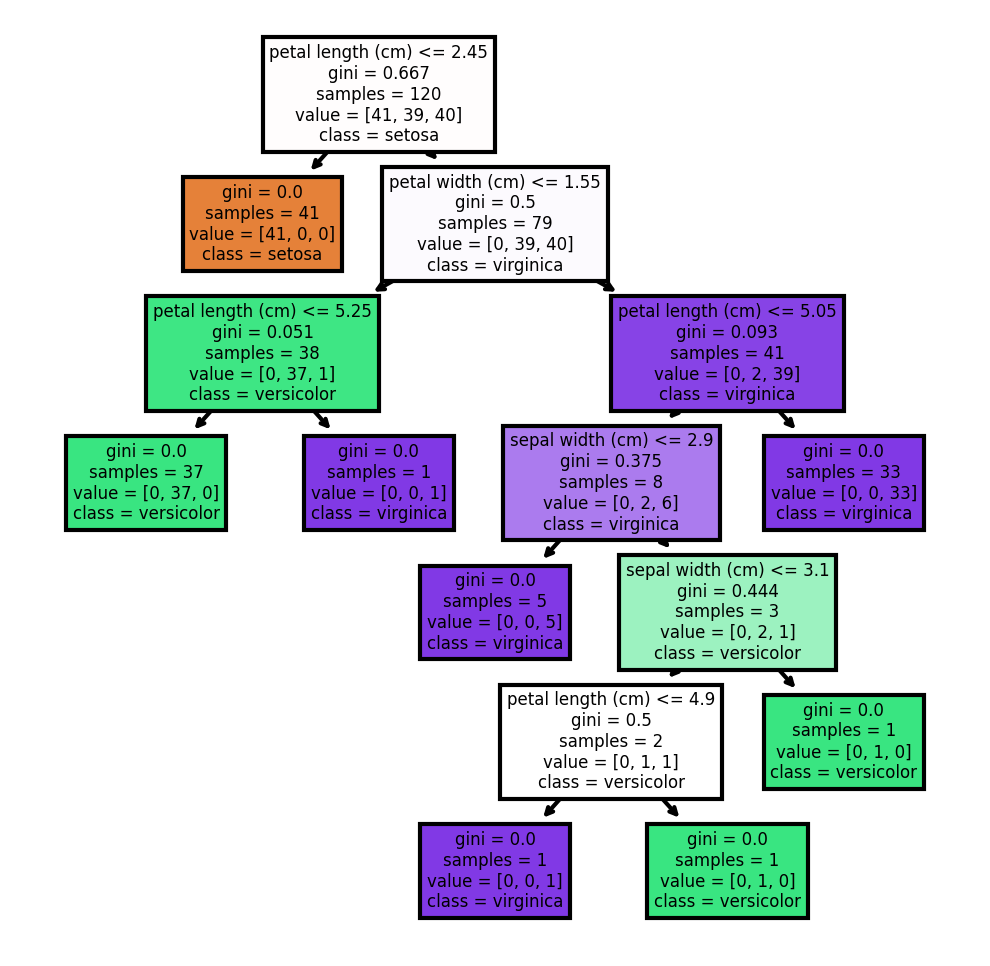

In [9]:
#tweak paramters to make it pretty
import matplotlib.pyplot as plt
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

Text(0.5, 0, 'Predicted label')

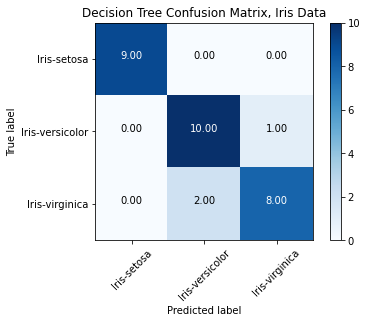

In [10]:
# a pretty confusion matrix
import itertools

cm=metrics.confusion_matrix(test_sln,iris_predictions)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix, Iris Data")
plt.colorbar()
plt.xticks([0,1,2], dt.classes_,rotation=45)
plt.yticks([0,1,2], dt.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# regression metrics

# more code here to generate test_sln and predictions for regression

print("MSE: ", metrics.mean_squared_error(test_sln,predictions))
print("r2 score: ", metrics.r2_score(test_sln,predictions))


In [11]:
# Normalization code using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)
